In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Nhập Môn Máy Học/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [6]:
## parsing data here
images, labels = parse_data(df)


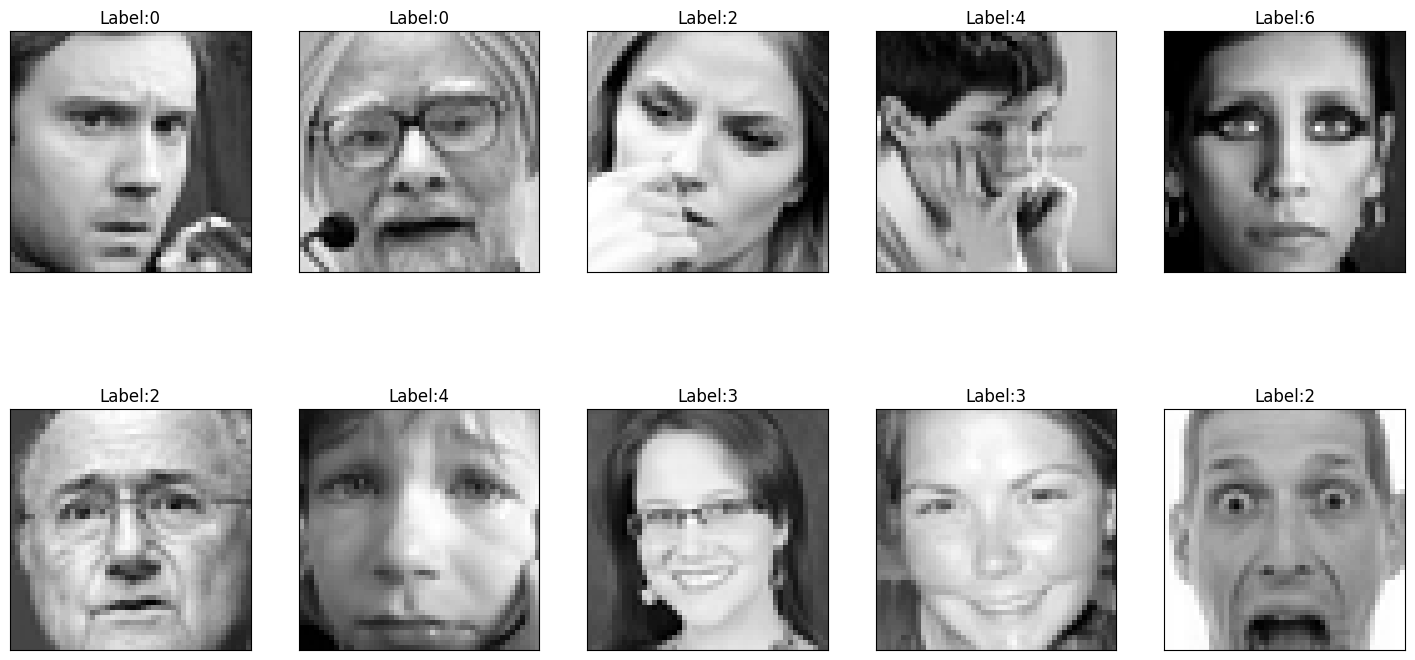

In [7]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

**Không dùng các kỹ thuật Features Extraction**

In [8]:
images[0]

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

In [9]:
labels[0]

0

In [10]:
images[0].shape

(48, 48)

In [11]:
a = images[0].reshape((48*48))
print(a)

[ 70.  80.  82. ... 106. 109.  82.]


In [12]:
import pandas as pd

df_list = []  # Collect each reshaped image as a DataFrame in a list

for a in images:
    a = a.reshape((48 * 48)).T
    df_list.append(pd.DataFrame(a))  # Append the DataFrame to the list

df1 = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames

array_from_df = df1.to_numpy()
reshaped_array = array_from_df.reshape((35887, 2304))

print(reshaped_array)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 17.  17.  16. ... 154. 133. 113.]
 [ 30.  28.  28. ...  35.  30.  28.]
 [ 19.  13.  14. ... 189. 199. 201.]]


In [13]:
reshaped_array.shape

(35887, 2304)

In [14]:
labels.shape

(35887,)

In [15]:
df2 = pd.DataFrame(reshaped_array)

In [16]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70.0,80.0,82.0,72.0,58.0,58.0,60.0,63.0,54.0,58.0,...,159.0,182.0,183.0,136.0,106.0,116.0,95.0,106.0,109.0,82.0
1,151.0,150.0,147.0,155.0,148.0,133.0,111.0,140.0,170.0,174.0,...,105.0,108.0,95.0,108.0,102.0,67.0,171.0,193.0,183.0,184.0
2,231.0,212.0,156.0,164.0,174.0,138.0,161.0,173.0,182.0,200.0,...,104.0,138.0,152.0,122.0,114.0,101.0,97.0,88.0,110.0,152.0
3,24.0,32.0,36.0,30.0,32.0,23.0,19.0,20.0,30.0,41.0,...,174.0,126.0,132.0,132.0,133.0,136.0,139.0,142.0,143.0,142.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,34.0,31.0,31.0,31.0,27.0,31.0,30.0,29.0,30.0


In [17]:
#chuẩn hóa dữ liệu dạn hình ảnh
df2 = df2/255.0

In [18]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df2) # modify images' array to the appropriate shape
pca2_df = pd.DataFrame(pca.transform(df2), columns=["pca1", "pca2"])

In [19]:
pca2_df.head()

,pca1,pca2
0,2.712748,-1.734622
1,-0.243237,2.202989
2,-5.186424,-1.630313
3,-0.910894,2.575702
4,7.045435,-7.863114


In [20]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([28.92651028,  9.80238969])

In [ ]:
## transform for visualizing here
# images_pca=pca.transform(df2) ## modify images' array to the appropriate shape
# images_pca.shape

In [21]:
from sklearn import decomposition


In [22]:
def plot_representations(data, labels, classes, n_images=None):

    if n_images is not None:
        data = data[:n_images]
        labels = labels[:n_images]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10')
    handles, labels = scatter.legend_elements()
    ax.legend(handles=handles, labels=classes)

In [23]:
def get_pca(data, n_components=2):
    pca = decomposition.PCA()
    pca.n_components = n_components
    pca_data = pca.fit_transform(data)
    return pca_data

In [24]:
classes = {"Angry":0, "Disgust":1, "Fear":2, "Happy":3, "Sad":4, "Surprise":5, "Neutral":6}

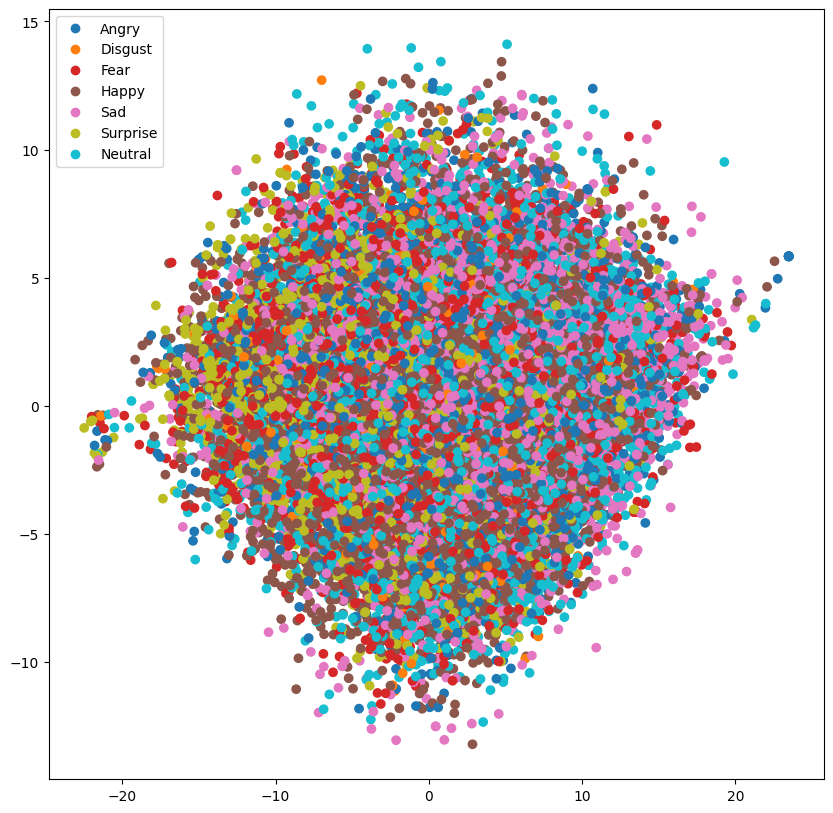

In [25]:
output_pca_data = get_pca(df2)
plot_representations(output_pca_data, labels, classes)

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [26]:
## determine the optimal number of PCs here
## pca.explained_variance_()

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
## splitting data into train/val/test subsets here

In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

**Sử dụng ogrinal data để train**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, labels, test_size=0.3, random_state=1)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


In [29]:
model_params  = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,40,80,120,140,200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='multinomial'),
        'params': {
              'penalty': ['l1', 'l2'],
              'C': [1, 10, 20],
               'solver': ['lbfgs', 'sag', 'saga']
        }
    }
}



In [ ]:
# SVM_parameters = {
#     'C': [1,10],
#     'kernel': ['rbf','linear']
# }


**Model SVM**

In [ ]:
clf_svm = GridSearchCV(model_params['svm']['model'],model_params['svm']['params'],cv=2,verbose=2,return_train_score=False)
clf_svm.fit(X_train,y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................C=1, kernel=rbf; total time=13.5min
[CV] END ....................................C=1, kernel=rbf; total time=13.5min
[CV] END ...................................C=10, kernel=rbf; total time=13.2min
[CV] END ...................................C=10, kernel=rbf; total time=12.8min
[CV] END ...................................C=20, kernel=rbf; total time=13.0min
[CV] END ...................................C=20, kernel=rbf; total time=12.6min


GridSearchCV(cv=2, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf']}, verbose=2)

In [ ]:
import pickle
import os

# Check if the directory exists, if not create it
directory_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param'
# Make sure this is the correct path to where you want to save the file.
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Now try to open the file for writing, using the corrected directory path
with open(os.path.join(directory_path, 'model_svm.pkl'), 'wb') as f:
    pickle.dump(clf_svm, f)

In [33]:
import pickle

# Path to the pickle file
pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param/model_svm.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    clf_svm = pickle.load(file)

In [ ]:
clf_svm.cv_results_

{'mean_fit_time': array([415.12809062, 388.27430999, 382.19761598]),
 'std_fit_time': array([3.14500117, 4.86158121, 3.35419786]),
 'mean_score_time': array([396.61351788, 392.68850875, 386.49387991]),
 'std_score_time': array([2.45515263, 6.78566217, 9.82666314]),
 'param_C': masked_array(data=[1, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'rbf'}],
 'split0_test_score': array([0.34179936, 0.38423567, 0.38917197]),
 'split1_test_score': array([0.35031847, 0.38312102, 0.38726115]),
 'mean_test_score': array([0.34605892, 0.38367834, 0.38821656]),
 'std_test_score': array([0.00425955, 0.00055732, 0.00095541]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

In [ ]:
List_i4_SVM = pd.DataFrame(clf_svm.cv_results_)
List_i4_SVM

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,415.128091,3.145001,396.613518,2.455153,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.341799,0.350318,0.346059,0.004260,3
1,388.274310,4.861581,392.688509,6.785662,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.384236,0.383121,0.383678,0.000557,2
2,382.197616,3.354198,386.493880,9.826663,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.389172,0.387261,0.388217,0.000955,1


In [ ]:
best_score_svm = clf_svm.best_score_
best_params_svm = clf_svm.best_params_
print(best_score_svm)
print(best_params_svm)

0.38821656050955416
{'C': 20, 'kernel': 'rbf'}


In [35]:
best_model_svm = clf_svm.best_estimator_

In [36]:
y_test_pred = best_model_svm.predict(X_test)

In [37]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.30      0.15      0.20      1493
           1       1.00      0.01      0.01       153
           2       0.29      0.17      0.22      1498
           3       0.47      0.73      0.57      2739
           4       0.32      0.35      0.34      1792
           5       0.54      0.49      0.51      1203
           6       0.37      0.36      0.36      1889

    accuracy                           0.41     10767
   macro avg       0.47      0.32      0.32     10767
weighted avg       0.39      0.41      0.38     10767



In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [39]:
def plot_confusion_matrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)

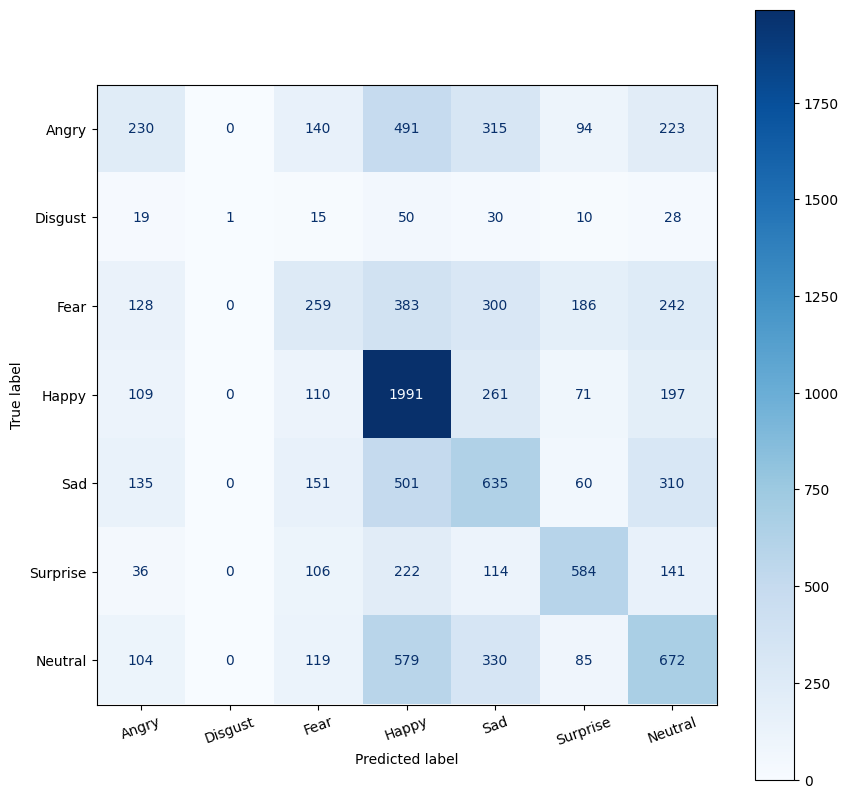

In [40]:
plot_confusion_matrix(y_test, y_test_pred, classes)

**Dùng model RandomForest để train**

In [ ]:
clf_RandomForest = GridSearchCV(model_params['random_forest']['model'],model_params['random_forest']['params'],cv=2,verbose=2,return_train_score=False)
clf_RandomForest.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .....................................n_estimators=1; total time=   1.3s
[CV] END .....................................n_estimators=1; total time=   1.2s
[CV] END .....................................n_estimators=5; total time=   4.1s
[CV] END .....................................n_estimators=5; total time=   3.0s
[CV] END ....................................n_estimators=10; total time=   5.8s
[CV] END ....................................n_estimators=10; total time=   7.3s
[CV] END ....................................n_estimators=20; total time=  13.5s
[CV] END ....................................n_estimators=20; total time=  11.9s
[CV] END ....................................n_estimators=40; total time=  24.3s
[CV] END ....................................n_estimators=40; total time=  24.7s
[CV] END ....................................n_estimators=80; total time=  48.2s
[CV] END ....................................n_es

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10, 20, 40, 80, 120, 140, 200]},
             verbose=2)

In [ ]:
# Path to the pickle file
pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param/model_RandomForest.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    clf_RandomForest = pickle.load(file)

In [ ]:
clf_RandomForest.cv_results_

{'mean_fit_time': array([  1.08035028,   3.45378172,   6.30755031,  12.15624309,
         23.97663295,  47.07838178,  69.68179834,  81.0411818 ,
        115.32645512]),
 'std_fit_time': array([0.07106841, 0.5672704 , 0.74122488, 0.6032095 , 0.1752001 ,
        0.18938804, 0.47489679, 0.18836403, 0.22084379]),
 'mean_score_time': array([0.15111375, 0.12059927, 0.21565533, 0.50617898, 0.49982095,
        0.85347271, 1.34664345, 1.56213665, 1.71587014]),
 'std_score_time': array([0.00374365, 0.00197148, 0.01051855, 0.20649374, 0.01456237,
        0.04311299, 0.40734029, 0.48328567, 0.22924423]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 40, 80, 120, 140, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 80},
  {'n_estima

In [ ]:
List_i4_RandomForest = pd.DataFrame(clf_RandomForest.cv_results_)
List_i4_RandomForest

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.080350,0.071068,0.151114,0.003744,1,{'n_estimators': 1},0.249761,0.259634,0.254697,0.004936,9
1,3.453782,0.567270,0.120599,0.001971,5,{'n_estimators': 5},0.295382,0.296338,0.295860,0.000478,8
2,6.307550,0.741225,0.215655,0.010519,10,{'n_estimators': 10},0.331210,0.327309,0.329260,0.001951,7
3,12.156243,0.603209,0.506179,0.206494,20,{'n_estimators': 20},0.365207,0.359076,0.362142,0.003065,6
4,23.976633,0.175200,0.499821,0.014562,40,{'n_estimators': 40},0.386306,0.384475,0.385390,0.000916,5
5,47.078382,0.189388,0.853473,0.043113,80,{'n_estimators': 80},0.408599,0.407006,0.407803,0.000796,4
6,69.681798,0.474897,1.346643,0.407340,120,{'n_estimators': 120},0.416401,0.421975,0.419188,0.002787,2
7,81.041182,0.188364,1.562137,0.483286,140,{'n_estimators': 140},0.417596,0.419506,0.418551,0.000955,3
8,115.326455,0.220844,1.715870,0.229244,200,{'n_estimators': 200},0.425159,0.421975,0.423567,0.001592,1


In [ ]:
best_score_RandomForest = clf_RandomForest.best_score_
best_params_RandomForest = clf_RandomForest.best_params_
best_model_RandomForest = clf_RandomForest.best_estimator_
print(best_score_RandomForest)
print(best_params_RandomForest)

0.42356687898089174
{'n_estimators': 200}


In [ ]:
y_test_pred_RandomForest = best_model_RandomForest.predict(X_test)

In [ ]:
import pickle
import os
# Check if the directory exists, if not create it
directory_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param'
# Make sure this is the correct path to where you want to save the file.
# if not os.path.exists(directory_path):
#     os.makedirs(directory_path)

# Now try to open the file for writing, using the corrected directory path
with open(os.path.join(directory_path, 'model_RandomForest.pkl'), 'wb') as f:
    pickle.dump(clf_RandomForest, f)

In [ ]:
from sklearn.metrics import classification_report
report_RandomForest = classification_report(y_test, y_test_pred_RandomForest)
print(report_RandomForest)

              precision    recall  f1-score   support

           0       0.51      0.19      0.28      1493
           1       1.00      0.24      0.38       153
           2       0.46      0.25      0.32      1498
           3       0.45      0.78      0.57      2739
           4       0.36      0.38      0.37      1792
           5       0.65      0.60      0.62      1203
           6       0.43      0.38      0.40      1889

    accuracy                           0.46     10767
   macro avg       0.55      0.40      0.42     10767
weighted avg       0.47      0.46      0.44     10767



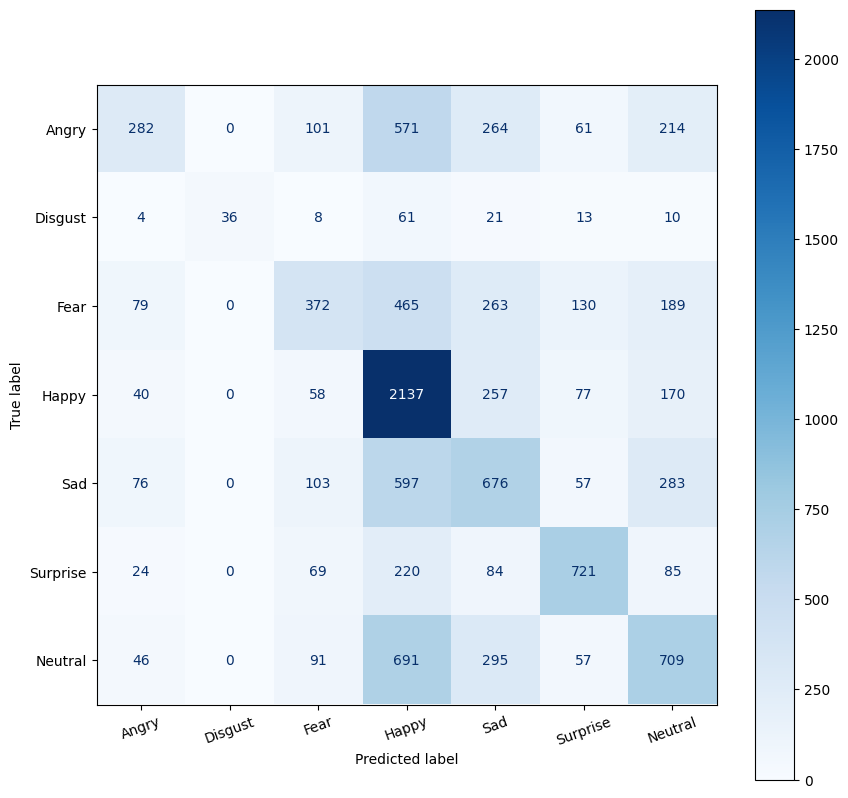

In [ ]:
plot_confusion_matrix(y_test, y_test_pred_RandomForest, classes)

**Thử RandomForest với n_estimator 500-1500**

In [ ]:
model_params1  = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [500,750,1000,1500]
        }
    }
}


In [ ]:
clf_RandomForest1 = GridSearchCV(model_params1['random_forest']['model'],model_params1['random_forest']['params'],cv=2,verbose=2,return_train_score=False)
clf_RandomForest1.fit(X_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END ...................................n_estimators=500; total time= 5.2min
[CV] END ...................................n_estimators=500; total time= 4.9min
[CV] END ...................................n_estimators=750; total time= 7.3min
[CV] END ...................................n_estimators=750; total time= 7.4min
[CV] END ..................................n_estimators=1000; total time=10.1min
[CV] END ..................................n_estimators=1000; total time= 9.9min
[CV] END ..................................n_estimators=1500; total time=15.1min
[CV] END ..................................n_estimators=1500; total time=15.1min


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [500, 750, 1000, 1500]}, verbose=2)

In [ ]:
import pickle
import os
# Check if the directory exists, if not create it
directory_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param'
# Make sure this is the correct path to where you want to save the file.
# if not os.path.exists(directory_path):
#     os.makedirs(directory_path)

# Now try to open the file for writing, using the corrected directory path
with open(os.path.join(directory_path, 'model_RandomForest1.pkl'), 'wb') as f:
    pickle.dump(clf_RandomForest1, f)

In [ ]:
# Path to the pickle file
pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param/model_RandomForest1.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    clf_RandomForest1 = pickle.load(file)

In [ ]:
clf_RandomForest1.cv_results_

{'mean_fit_time': array([299.10235858, 434.17524815, 591.77070808, 894.04342926]),
 'std_fit_time': array([10.76331234,  0.22342134,  7.17907   ,  1.33298695]),
 'mean_score_time': array([ 4.43624353,  6.90179849,  9.01013112, 13.24195004]),
 'std_score_time': array([0.03911567, 0.65984488, 0.99446344, 0.21944404]),
 'param_n_estimators': masked_array(data=[500, 750, 1000, 1500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 500},
  {'n_estimators': 750},
  {'n_estimators': 1000},
  {'n_estimators': 1500}],
 'split0_test_score': array([0.43073248, 0.43216561, 0.43447452, 0.4339172 ]),
 'split1_test_score': array([0.42929936, 0.43128981, 0.43009554, 0.43343949]),
 'mean_test_score': array([0.43001592, 0.43172771, 0.43228503, 0.43367834]),
 'std_test_score': array([0.00071656, 0.0004379 , 0.00218949, 0.00023885]),
 'rank_test_score': array([4, 3, 2, 1], dtype=int32)}

In [ ]:
List_i4_RandomForest1 = pd.DataFrame(clf_RandomForest1.cv_results_)
List_i4_RandomForest1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,299.102359,10.763312,4.436244,0.039116,500,{'n_estimators': 500},0.430732,0.429299,0.430016,0.000717,4
1,434.175248,0.223421,6.901798,0.659845,750,{'n_estimators': 750},0.432166,0.431290,0.431728,0.000438,3
2,591.770708,7.179070,9.010131,0.994463,1000,{'n_estimators': 1000},0.434475,0.430096,0.432285,0.002189,2
3,894.043429,1.332987,13.241950,0.219444,1500,{'n_estimators': 1500},0.433917,0.433439,0.433678,0.000239,1


In [ ]:
best_score_RandomForest1 = clf_RandomForest1.best_score_
best_params_RandomForest1 = clf_RandomForest1.best_params_
print(best_score_RandomForest1)
print(best_params_RandomForest1)

0.4336783439490446
{'n_estimators': 1500}


In [ ]:
best_model_RandomForest1= clf_RandomForest1.best_estimator_

In [ ]:
y_test_pred_RandomForest1 = best_model_RandomForest1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
report_RandomForest1 = classification_report(y_test, y_test_pred_RandomForest1)
print(report_RandomForest1)

              precision    recall  f1-score   support

           0       0.65      0.18      0.28      1493
           1       1.00      0.24      0.39       153
           2       0.54      0.26      0.35      1498
           3       0.45      0.81      0.58      2739
           4       0.38      0.41      0.39      1792
           5       0.65      0.61      0.63      1203
           6       0.44      0.39      0.42      1889

    accuracy                           0.47     10767
   macro avg       0.59      0.41      0.43     10767
weighted avg       0.51      0.47      0.45     10767



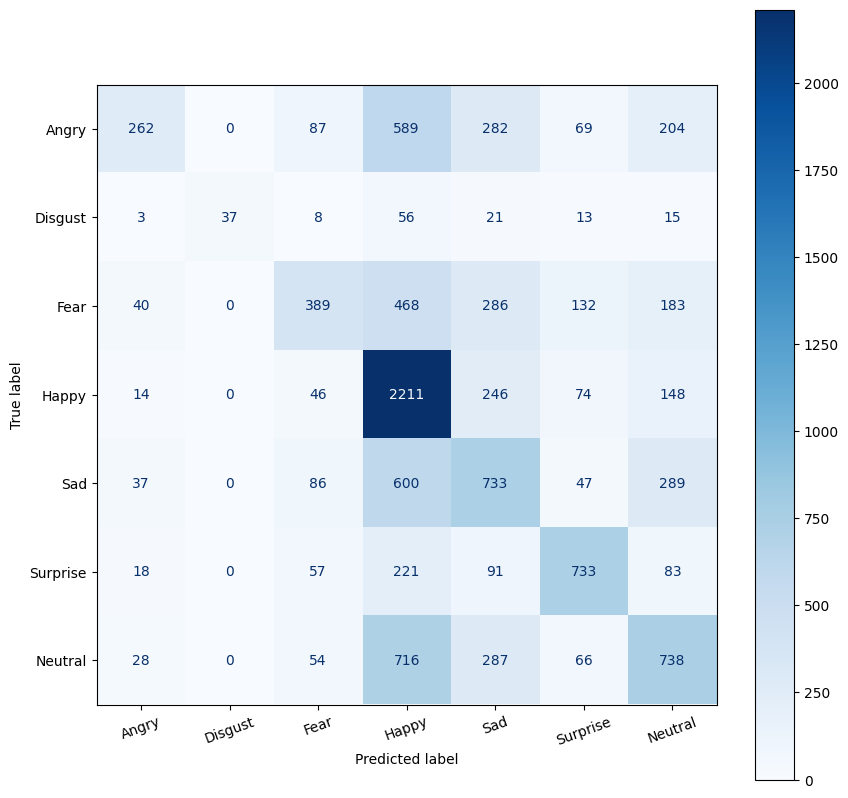

In [ ]:
plot_confusion_matrix(y_test, y_test_pred_RandomForest1, classes)

**Dùng logictis regression**

In [ ]:
clf_logistic_regression = GridSearchCV(model_params['logistic_regression']['model'],model_params['logistic_regression']['params'],cv=2,verbose=2,return_train_score=False)
clf_logistic_regression.fit(X_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.5s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.2s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 9.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time= 9.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=  22.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time= 2.6min
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.2s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.7min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time= 7.7min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=  22.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time= 2.6min
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.2s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.2s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time= 7.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time= 7.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=20, penalty=l2, solver=lbfgs; total time=  23.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=20, penalty=l2, solver=lbfgs; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=20, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=20, penalty=l2, solver=sag; total time= 2.1min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l2, solver=saga; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, 

[CV] END ......................C=20, penalty=l2, solver=saga; total time= 2.6min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=2, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [1, 10, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             verbose=2)

In [ ]:
import pickle
import os
# Check if the directory exists, if not create it
directory_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param'
# Make sure this is the correct path to where you want to save the file.
# if not os.path.exists(directory_path):
#     os.makedirs(directory_path)

# Now try to open the file for writing, using the corrected directory path
with open(os.path.join(directory_path, 'model_logistic_regression.pkl'), 'wb') as f:
    pickle.dump(clf_logistic_regression, f)

In [ ]:
clf_logistic_regression.cv_results_

{'mean_fit_time': array([3.54595900e-01, 1.68519258e-01, 5.49109081e+02, 2.26160073e+01,
        1.26470821e+02, 1.57821001e+02, 1.71384811e-01, 1.60462499e-01,
        4.64025911e+02, 2.39582660e+01, 1.26596777e+02, 1.57541703e+02,
        1.74959302e-01, 1.54644132e-01, 4.48486321e+02, 2.46641847e+01,
        1.26371675e+02, 1.58336100e+02]),
 'std_fit_time': array([1.74821615e-01, 1.15966797e-03, 3.75043178e+00, 5.22624969e-01,
        8.37279558e-02, 1.82729125e-01, 1.42402649e-02, 7.22467899e-03,
        3.78682613e-02, 1.33523154e+00, 7.14578032e-01, 3.48615646e-01,
        2.19374895e-02, 7.96914101e-04, 7.03541040e-02, 9.15036798e-01,
        5.57173610e-01, 4.77542877e-02]),
 'mean_score_time': array([0.        , 0.        , 0.13163638, 0.21376252, 0.15195286,
        0.12618208, 0.        , 0.        , 0.1287477 , 0.24289322,
        0.16547894, 0.16030216, 0.        , 0.        , 0.13806403,
        0.38215148, 0.12848663, 0.12689817]),
 'std_score_time': array([0.        , 

In [ ]:
List_i4_Logictis = pd.DataFrame(clf_RandomForest1.cv_results_)
List_i4_Logictis

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,299.102359,10.763312,4.436244,0.039116,500,{'n_estimators': 500},0.430732,0.429299,0.430016,0.000717,4
1,434.175248,0.223421,6.901798,0.659845,750,{'n_estimators': 750},0.432166,0.431290,0.431728,0.000438,3
2,591.770708,7.179070,9.010131,0.994463,1000,{'n_estimators': 1000},0.434475,0.430096,0.432285,0.002189,2
3,894.043429,1.332987,13.241950,0.219444,1500,{'n_estimators': 1500},0.433917,0.433439,0.433678,0.000239,1


In [ ]:
best_score_Logictis = clf_logistic_regression.best_score_
best_params_Logictis = clf_logistic_regression.best_params_
print(best_score_Logictis)
print(best_params_Logictis)

0.3597531847133758
{'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
best_model_Logictis = clf_logistic_regression.best_estimator_

In [ ]:
y_test_pred_Logictis = best_model_Logictis.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
report_Logictis = classification_report(y_test, y_test_pred_Logictis)
print(report_Logictis)

              precision    recall  f1-score   support

           0       0.26      0.14      0.18      1493
           1       0.20      0.01      0.01       153
           2       0.24      0.15      0.18      1498
           3       0.45      0.64      0.53      2739
           4       0.27      0.30      0.28      1792
           5       0.45      0.45      0.45      1203
           6       0.34      0.35      0.34      1889

    accuracy                           0.36     10767
   macro avg       0.32      0.29      0.28     10767
weighted avg       0.34      0.36      0.34     10767



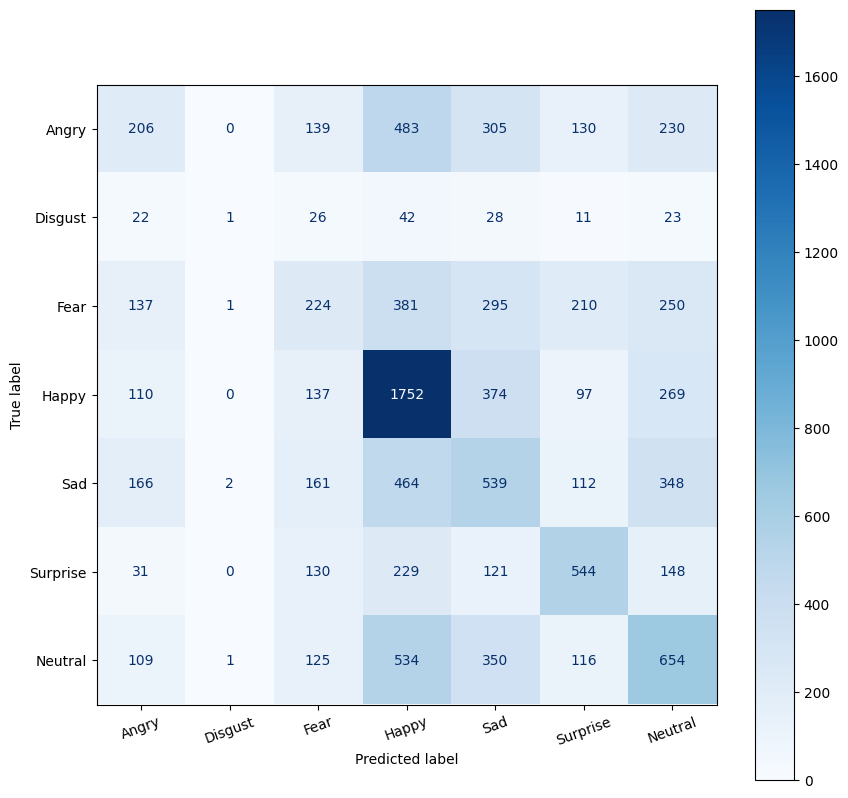

In [ ]:
plot_confusion_matrix(y_test, y_test_pred_Logictis, classes)

**Dùng MLP để phân lớp**

In [ ]:
# scores = []
# for model_name,mp in SVM_parameters.items():
#     clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
#     clf.fit(X_train,y_train)
#     scores.append({
#         'model':model_name,
#         'best_score':clf.best_score_,
#         'best_params':clf.best_params_
#     })

In [ ]:
# ,
#     'mlp': {
#         'model': MLPClassifier(),
#         'params': {
#             'hidden_layer_sizes': [(100,),(10,30,10),(20,)],
#             'activation': ['logistic','tanh', 'relu'],
#             'alpha': [0.01, 0.05],
#             'solver': ['sgd', 'adam'],

#         }
#     }

In [ ]:
MLP_parameters = {
          'hidden_layer_sizes': [(100,),(10,30,10),(20,)],
          'activation': ['logistic','tanh', 'relu'],
          'learning_rate_init': [0.01, 0.05],
          'solver': ['sgd', 'adam']
            }

In [ ]:
mlp_gs = MLPClassifier()


In [ ]:
clf_mlp = GridSearchCV(mlp_gs,MLP_parameters,cv=2,verbose=2,return_train_score=False)
clf_mlp.fit(X_train,y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.4min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.3min
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  26.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time= 3.3min
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  29.6s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  24.0s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=   9.3s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=   5.6s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  11.9s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time= 1.1min
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  54.5s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   8.8s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time= 1.4min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time= 1.4min
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  14.1s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  13.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  46.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  55.2s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=  14.9s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.7min


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.7min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  16.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  16.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time= 1.4min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time= 1.2min
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  34.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  16.0s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  48.1s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time= 1.0min
[CV

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.3min
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time= 3.0min
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  55.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time= 3.0min
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  59.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  51.7s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  39.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  25.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  55.5s
[CV] END 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (10, 30, 10), (20,)],
                         'learning_rate_init': [0.01, 0.05],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [ ]:
import pickle
import os
# Check if the directory exists, if not create it
directory_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param'
# Make sure this is the correct path to where you want to save the file.
# if not os.path.exists(directory_path):
#     os.makedirs(directory_path)

# Now try to open the file for writing, using the corrected directory path
with open(os.path.join(directory_path, 'model_MLP.pkl'), 'wb') as f:
    pickle.dump(clf_mlp, f)

In [44]:
# Path to the pickle file
pickle_file_path = '/content/drive/MyDrive/Colab Notebooks/Khóa Luận/param/model_MLP.pkl'

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    clf_mlp = pickle.load(file)

In [45]:
clf_mlp.cv_results_

{'mean_fit_time': array([200.69120741,  22.29788315, 196.73771036,  26.34157681,
          7.32323563,  10.20214272,  61.24186885,   7.99413574,
         80.97196174,  13.66923583,  50.74578178,  10.51560104,
        221.99252331,  16.07472682,  78.64732575,  24.78465581,
         55.01743805,  11.78609443,  31.82741606,   6.91993046,
         59.93796933,   7.42534351,  21.33268285,   7.73460209,
        190.15024972, 117.5766592 ,  55.32500112,  31.78961766,
         47.93142891,   9.05583227,   7.82446015,   6.00239372,
         38.22040105,  21.28677893,   7.45401311,   5.83203971]),
 'std_fit_time': array([ 5.39434385,  3.99442613,  1.14985549,  2.67964649,  1.87664568,
         1.5185864 ,  7.00159323,  0.62868631,  0.10605145,  0.24540508,
         4.30005443,  4.23758161,  1.28062594,  0.08886027,  5.15513659,
         9.13674402,  7.10680234,  1.68681359, 24.19488466,  1.70938873,
         1.54745805,  2.19123554, 15.44540954,  0.33700049,  8.14271641,
        62.20628691,  3.

In [46]:
List_i4_MLP = pd.DataFrame(clf_mlp.cv_results_)
List_i4_MLP

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,200.691207,5.394344,0.323817,0.000420,logistic,"(100,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.377707,0.380414,0.379061,0.001354,1
1,22.297883,3.994426,0.440642,0.145132,logistic,"(100,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.249204,0.249045,0.249124,0.000080,18
2,196.737710,1.149855,0.457856,0.121311,logistic,"(100,)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.382564,0.369029,0.375796,0.006768,3
3,26.341577,2.679646,0.423686,0.116147,logistic,"(100,)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.171019,0.171895,0.171457,0.000438,36
4,7.323236,1.876646,0.142154,0.001353,logistic,"(10, 30, 10)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
5,10.202143,1.518586,0.196489,0.048288,logistic,"(10, 30, 10)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
6,61.241869,7.001593,0.185480,0.029491,logistic,"(10, 30, 10)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.352389,0.330494,0.341441,0.010947,9
7,7.994136,0.628686,0.200594,0.056046,logistic,"(10, 30, 10)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
8,80.971962,0.106051,0.213959,0.036722,logistic,"(20,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.370621,0.361704,0.366162,0.004459,4
9,13.669236,0.245405,0.164699,0.000989,logistic,"(20,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.249204,0.249045,0.249124,0.000080,18


In [47]:
best_score_mlp = clf_mlp.best_score_
best_params_mlp = clf_mlp.best_params_
print(best_score_mlp)
print(best_params_mlp)

0.37906050955414017
{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [49]:
best_model_mlp = clf_mlp.best_estimator_
y_test_pred_mlp = best_model_mlp.predict(X_test)
from sklearn.metrics import classification_report
report_mlp = classification_report(y_test, y_test_pred_mlp)
print(report_mlp)

              precision    recall  f1-score   support

           0       0.31      0.25      0.28      1493
           1       0.48      0.10      0.17       153
           2       0.29      0.20      0.23      1498
           3       0.48      0.73      0.58      2739
           4       0.31      0.35      0.33      1792
           5       0.57      0.51      0.54      1203
           6       0.39      0.25      0.30      1889

    accuracy                           0.41     10767
   macro avg       0.41      0.34      0.35     10767
weighted avg       0.40      0.41      0.39     10767



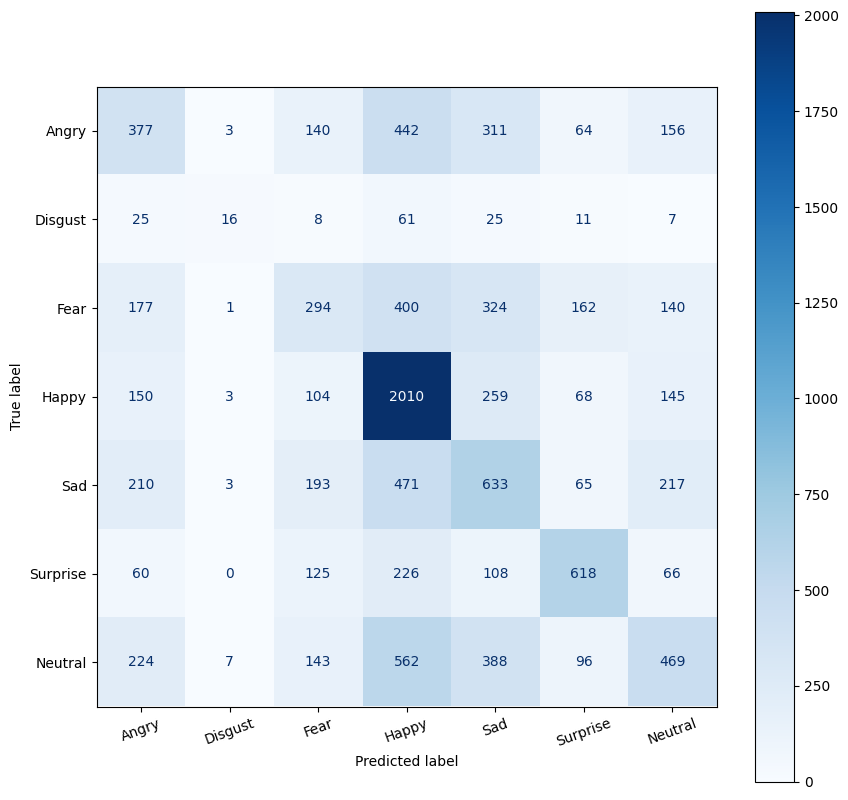

In [50]:
plot_confusion_matrix(y_test, y_test_pred_mlp, classes)

**Dùng Kỹ thuật optimal PCA với tập data**

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



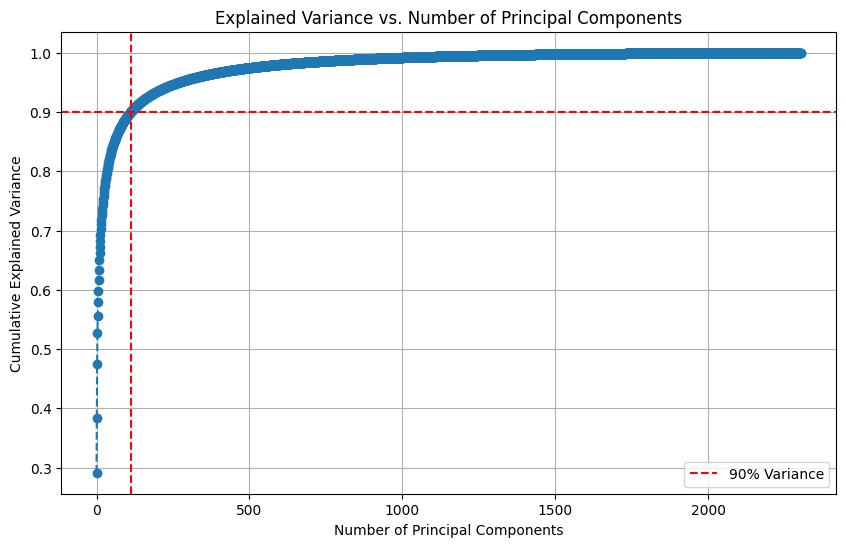

Number of components to retain 90% of variance: 113
Shape of the transformed data: (35887, 113)


In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.90), color='r', linestyle='--')
plt.grid()
plt.legend()
plt.show()

# Find the number of components that retain at least 90% of the variance
k = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% of variance: {k}")

# Optionally, transform the data using the chosen number of components
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

# Print the transformed data shape
print(f"Shape of the transformed data: {X_pca.shape}")

In [52]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, labels, test_size=0.3, random_state=1)
clf_svm_pca = GridSearchCV(model_params['svm']['model'],model_params['svm']['params'],cv=2,verbose=2,return_train_score=False)
clf_svm_pca.fit(X_train_pca,y_train_pca)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] END ....................................C=1, kernel=rbf; total time= 1.3min
[CV] END ....................................C=1, kernel=rbf; total time= 1.4min
[CV] END ...................................C=10, kernel=rbf; total time= 1.3min
[CV] END ...................................C=10, kernel=rbf; total time= 1.4min
[CV] END ...................................C=20, kernel=rbf; total time= 1.2min
[CV] END ...................................C=20, kernel=rbf; total time= 1.3min


GridSearchCV(cv=2, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf']}, verbose=2)

In [53]:
clf_svm_pca.cv_results_

{'mean_fit_time': array([49.13636971, 47.68807399, 44.07435679]),
 'std_fit_time': array([1.11434555, 1.04503882, 0.22347116]),
 'mean_score_time': array([31.86451924, 34.93410456, 30.7209208 ]),
 'std_score_time': array([0.19784009, 5.34831345, 0.88278937]),
 'param_C': masked_array(data=[1, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'rbf'}],
 'split0_test_score': array([0.3102707 , 0.32181529, 0.32181529]),
 'split1_test_score': array([0.3102707 , 0.32181529, 0.32181529]),
 'mean_test_score': array([0.3102707 , 0.32181529, 0.32181529]),
 'std_test_score': array([0., 0., 0.]),
 'rank_test_score': array([3, 1, 1], dtype=int32)}

In [54]:
List_i4_svm_pca = pd.DataFrame(clf_mlp.cv_results_)
List_i4_svm_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,200.691207,5.394344,0.323817,0.000420,logistic,"(100,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.377707,0.380414,0.379061,0.001354,1
1,22.297883,3.994426,0.440642,0.145132,logistic,"(100,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.249204,0.249045,0.249124,0.000080,18
2,196.737710,1.149855,0.457856,0.121311,logistic,"(100,)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.382564,0.369029,0.375796,0.006768,3
3,26.341577,2.679646,0.423686,0.116147,logistic,"(100,)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.171019,0.171895,0.171457,0.000438,36
4,7.323236,1.876646,0.142154,0.001353,logistic,"(10, 30, 10)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
5,10.202143,1.518586,0.196489,0.048288,logistic,"(10, 30, 10)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
6,61.241869,7.001593,0.185480,0.029491,logistic,"(10, 30, 10)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.352389,0.330494,0.341441,0.010947,9
7,7.994136,0.628686,0.200594,0.056046,logistic,"(10, 30, 10)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.248806,0.248806,0.248806,0.000000,24
8,80.971962,0.106051,0.213959,0.036722,logistic,"(20,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.370621,0.361704,0.366162,0.004459,4
9,13.669236,0.245405,0.164699,0.000989,logistic,"(20,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.249204,0.249045,0.249124,0.000080,18


In [55]:
best_score_svm_pca = clf_svm_pca.best_score_
best_params_svm_pca = clf_svm_pca.best_params_
print(best_score_svm_pca)
print(best_params_svm_pca)

0.32181528662420383
{'C': 10, 'kernel': 'rbf'}


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
best_model_svm_pca = clf_svm_pca.best_estimator_
y_test_pred_svm_pca = best_model_svm_pca.predict(X_test_pca)

In [59]:
report = classification_report(y_test, y_test_pred_svm_pca)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.12      0.21      1493
           1       1.00      0.30      0.46       153
           2       0.86      0.17      0.28      1498
           3       0.29      0.99      0.45      2739
           4       0.80      0.10      0.18      1792
           5       0.97      0.35      0.52      1203
           6       0.80      0.12      0.20      1889

    accuracy                           0.37     10767
   macro avg       0.80      0.31      0.33     10767
weighted avg       0.71      0.37      0.31     10767



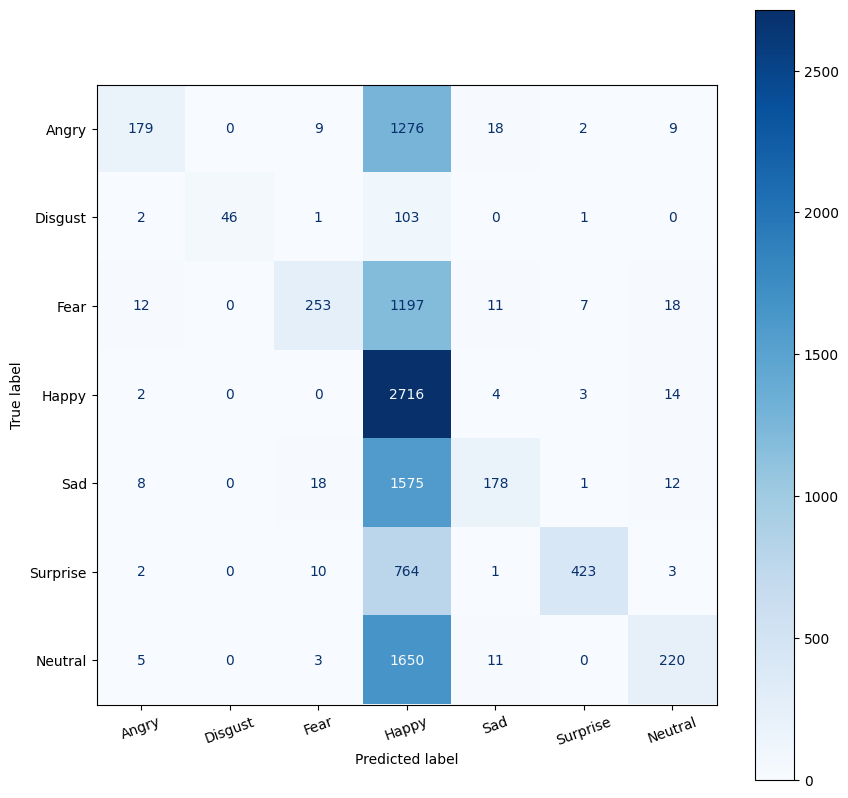

In [60]:
plot_confusion_matrix(y_test, y_test_pred_svm_pca, classes)

In [ ]:
## visualize the confusion matrices and classification reports here

**Dùng RandomForest**

In [62]:
clf_RandomForest_pca = GridSearchCV(model_params['random_forest']['model'],model_params['random_forest']['params'],cv=2,verbose=2,return_train_score=False)
clf_RandomForest_pca.fit(X_train_pca,y_train_pca)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .....................................n_estimators=1; total time=   0.3s
[CV] END .....................................n_estimators=1; total time=   0.3s
[CV] END .....................................n_estimators=5; total time=   1.3s
[CV] END .....................................n_estimators=5; total time=   1.3s
[CV] END ....................................n_estimators=10; total time=   2.5s
[CV] END ....................................n_estimators=10; total time=   2.1s
[CV] END ....................................n_estimators=20; total time=   4.4s
[CV] END ....................................n_estimators=20; total time=   3.4s
[CV] END ....................................n_estimators=40; total time=   7.0s
[CV] END ....................................n_estimators=40; total time=   7.8s
[CV] END ....................................n_estimators=80; total time=  14.8s
[CV] END ....................................n_es

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10, 20, 40, 80, 120, 140, 200]},
             verbose=2)

In [63]:
clf_RandomForest_pca.cv_results_

{'mean_fit_time': array([ 0.28303242,  1.26941836,  2.27040434,  3.81986284,  7.2474339 ,
        14.41763413, 22.489452  , 24.94100678, 37.41284609]),
 'std_fit_time': array([0.00293803, 0.04056704, 0.21533275, 0.51821685, 0.44156766,
        0.06448114, 1.40275562, 0.67571867, 0.56912923]),
 'mean_score_time': array([0.01459491, 0.03178084, 0.05177605, 0.08508563, 0.17890084,
        0.31962788, 0.53802872, 0.60742474, 0.78821731]),
 'std_score_time': array([0.00043023, 0.00024188, 0.00269401, 0.00730562, 0.02363741,
        0.02157676, 0.02993155, 0.07166576, 0.01883745]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 20, 40, 80, 120, 140, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 40},
  {'n_estimators': 80},
  {'n_estimators': 120},
  {'

In [73]:
List_i4_RandomForest_pca = pd.DataFrame(clf_RandomForest_pca.cv_results_)
List_i4_RandomForest_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.283032,0.002938,0.014595,0.000430,1,{'n_estimators': 1},0.224920,0.229220,0.227070,0.002150,9
1,1.269418,0.040567,0.031781,0.000242,5,{'n_estimators': 5},0.273806,0.263774,0.268790,0.005016,8
2,2.270404,0.215333,0.051776,0.002694,10,{'n_estimators': 10},0.299602,0.293153,0.296377,0.003225,7
3,3.819863,0.518217,0.085086,0.007306,20,{'n_estimators': 20},0.330494,0.321895,0.326194,0.004299,6
4,7.247434,0.441568,0.178901,0.023637,40,{'n_estimators': 40},0.351274,0.356051,0.353662,0.002389,5
5,14.417634,0.064481,0.319628,0.021577,80,{'n_estimators': 80},0.377229,0.378742,0.377986,0.000756,4
6,22.489452,1.402756,0.538029,0.029932,120,{'n_estimators': 120},0.385669,0.384395,0.385032,0.000637,2
7,24.941007,0.675719,0.607425,0.071666,140,{'n_estimators': 140},0.384873,0.383758,0.384315,0.000557,3
8,37.412846,0.569129,0.788217,0.018837,200,{'n_estimators': 200},0.389650,0.389968,0.389809,0.000159,1


In [65]:
best_score_RandomForest_pca = clf_RandomForest_pca.best_score_
best_params_RandomForest_pca = clf_RandomForest_pca.best_params_
print(best_score_RandomForest_pca)
print(best_params_RandomForest_pca)

0.38980891719745225
{'n_estimators': 200}


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
best_model_RandomForest_pca = clf_RandomForest_pca.best_estimator_
y_test_pred_RandomForest_pca = best_model_RandomForest_pca.predict(X_test_pca)

In [67]:
report = classification_report(y_test, y_test_pred_RandomForest_pca)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.15      0.23      1493
           1       1.00      0.24      0.39       153
           2       0.53      0.22      0.32      1498
           3       0.38      0.84      0.53      2739
           4       0.37      0.33      0.35      1792
           5       0.78      0.52      0.62      1203
           6       0.45      0.30      0.36      1889

    accuracy                           0.44     10767
   macro avg       0.58      0.37      0.40     10767
weighted avg       0.49      0.44      0.41     10767



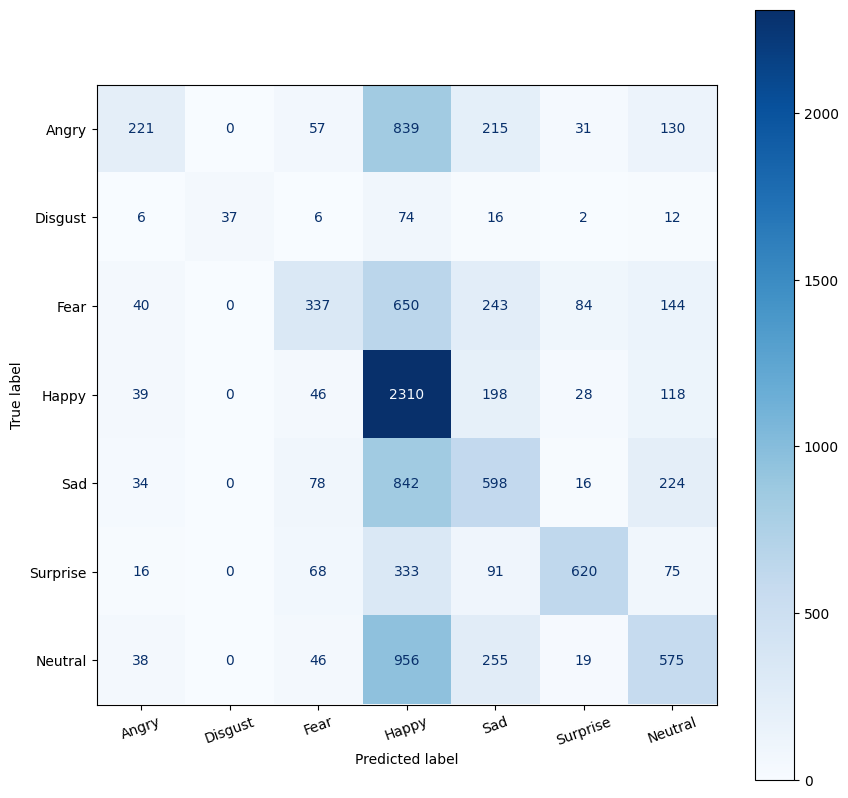

In [68]:
plot_confusion_matrix(y_test, y_test_pred_RandomForest_pca, classes)

**Random Forest với n_estimate từ 500 -1500**

In [70]:
model_params  = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,40,80,120,140,200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='multinomial'),
        'params': {
              'penalty': ['l1', 'l2'],
              'C': [1, 10, 20],
               'solver': ['lbfgs', 'sag', 'saga']
        }
    }
}

model_params1  = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [500,750,1000,1500]
        }
    }
}

MLP_parameters = {
          'hidden_layer_sizes': [(100,),(10,30,10),(20,)],
          'activation': ['logistic','tanh', 'relu'],
          'learning_rate_init': [0.01, 0.05],
          'solver': ['sgd', 'adam']
            }

In [71]:
clf_RandomForest_pca_1 = GridSearchCV(model_params1['random_forest']['model'],model_params1['random_forest']['params'],cv=5,verbose=2,return_train_score=False)
clf_RandomForest_pca_1.fit(X_train_pca,y_train_pca)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ...................................n_estimators=500; total time= 2.6min
[CV] END ...................................n_estimators=500; total time= 2.6min
[CV] END ...................................n_estimators=500; total time= 2.6min
[CV] END ...................................n_estimators=500; total time= 2.6min
[CV] END ...................................n_estimators=500; total time= 2.6min
[CV] END ...................................n_estimators=750; total time= 3.9min
[CV] END ...................................n_estimators=750; total time= 3.9min
[CV] END ...................................n_estimators=750; total time= 3.9min
[CV] END ...................................n_estimators=750; total time= 3.9min
[CV] END ...................................n_estimators=750; total time= 3.9min
[CV] END ..................................n_estimators=1000; total time= 5.3min
[CV] END ..................................n_esti

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [500, 750, 1000, 1500]}, verbose=2)

In [72]:
clf_RandomForest_pca_1.cv_results_

{'mean_fit_time': array([155.78765788, 234.54509649, 313.40912466, 470.40873194]),
 'std_fit_time': array([0.9263062 , 1.01290813, 1.35368067, 3.05213591]),
 'mean_score_time': array([1.01395774, 1.51730194, 1.99224625, 2.96175566]),
 'std_score_time': array([0.11802994, 0.14840893, 0.04649647, 0.18729709]),
 'param_n_estimators': masked_array(data=[500, 750, 1000, 1500],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 500},
  {'n_estimators': 750},
  {'n_estimators': 1000},
  {'n_estimators': 1500}],
 'split0_test_score': array([0.42237261, 0.42316879, 0.42714968, 0.42396497]),
 'split1_test_score': array([0.42695064, 0.43511146, 0.43351911, 0.43292197]),
 'split2_test_score': array([0.42555732, 0.42018312, 0.42436306, 0.42336783]),
 'split3_test_score': array([0.43650478, 0.43511146, 0.44167994, 0.44148089]),
 'split4_test_score': array([0.42217357, 0.42555732, 0.42515924, 0.42953822]),
 'mean_test_scor

In [76]:
List_i4_RandomForest_pca_1 = pd.DataFrame(clf_RandomForest_pca_1.cv_results_)
List_i4_RandomForest_pca_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,155.787658,0.926306,1.013958,0.118030,500,{'n_estimators': 500},0.422373,0.426951,0.425557,0.436505,0.422174,0.426712,0.005229,4
1,234.545096,1.012908,1.517302,0.148409,750,{'n_estimators': 750},0.423169,0.435111,0.420183,0.435111,0.425557,0.427826,0.006187,3
2,313.409125,1.353681,1.992246,0.046496,1000,{'n_estimators': 1000},0.427150,0.433519,0.424363,0.441680,0.425159,0.430374,0.006503,1
3,470.408732,3.052136,2.961756,0.187297,1500,{'n_estimators': 1500},0.423965,0.432922,0.423368,0.441481,0.429538,0.430255,0.006643,2


In [77]:
best_score_RandomForest_pca_1 = clf_RandomForest_pca_1.best_score_
best_params_RandomForest_pca_1 = clf_RandomForest_pca_1.best_params_
print(best_score_RandomForest_pca_1)
print(best_params_RandomForest_pca_1)

0.43037420382165603
{'n_estimators': 1000}


In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
best_model_RandomForest_pca_1 = clf_RandomForest_pca_1.best_estimator_
y_test_pred_RandomForest_pca_1 = best_model_RandomForest_pca_1.predict(X_test_pca)

In [79]:
report = classification_report(y_test, y_test_pred_RandomForest_pca_1)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.14      0.24      1493
           1       1.00      0.23      0.37       153
           2       0.66      0.22      0.33      1498
           3       0.38      0.89      0.53      2739
           4       0.40      0.33      0.37      1792
           5       0.79      0.54      0.64      1203
           6       0.49      0.30      0.37      1889

    accuracy                           0.45     10767
   macro avg       0.64      0.38      0.41     10767
weighted avg       0.55      0.45      0.42     10767



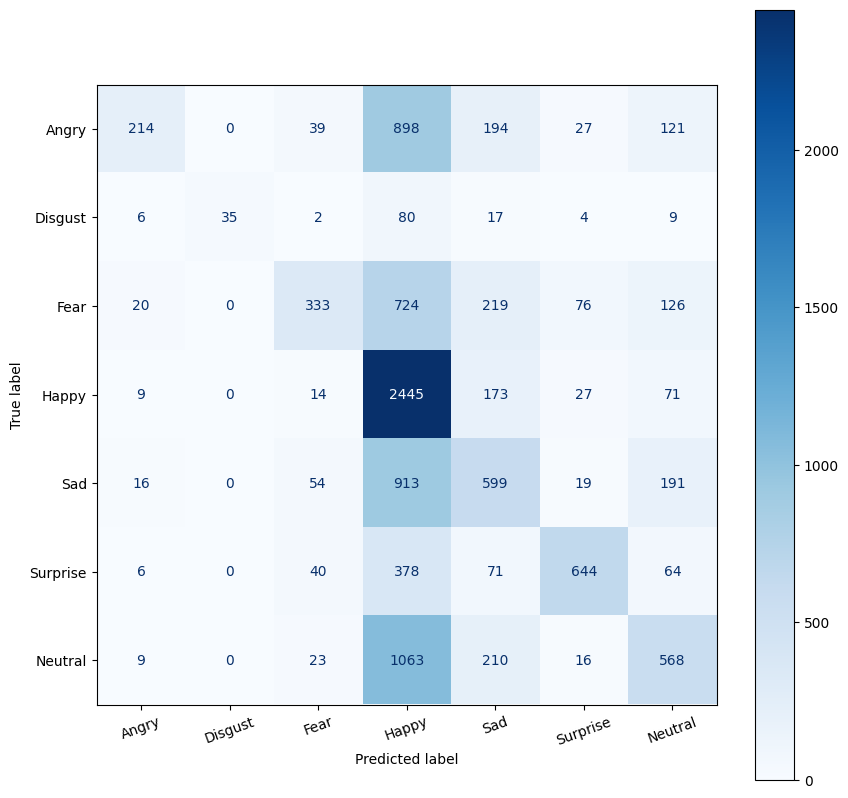

In [80]:
plot_confusion_matrix(y_test, y_test_pred_RandomForest_pca_1, classes)

**Dùng logictics regresion**

In [83]:
clf_logictics_pca = GridSearchCV(model_params['logistic_regression']['model'],model_params['logistic_regression']['params'],cv=2,verbose=2,return_train_score=False)
clf_logictics_pca.fit(X_train_pca,y_train_pca)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=1, penalty=l1, solver=sag; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=  14.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l1, solver=saga; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........................C=1, penalty=l2, solver=sag; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=1, penalty=l2, solver=saga; total time=   9.5s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=10, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=10, penalty=l1, solver=sag; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l1, solver=saga; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=10, penalty=l2, solver=sag; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=10, penalty=l2, solver=saga; total time=  10.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=20, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......................C=20, penalty=l1, solver=sag; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l1, solver=saga; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=20, penalty=l2, solver=lbfgs; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................C=20, penalty=l2, solver=lbfgs; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=20, penalty=l2, solver=sag; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................C=20, penalty=l2, solver=sag; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=20, penalty=l2, solver=saga; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, 

[CV] END ......................C=20, penalty=l2, solver=saga; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=2, estimator=LogisticRegression(multi_class='multinomial'),
             param_grid={'C': [1, 10, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga']},
             verbose=2)

In [84]:
clf_logictics_pca.cv_results_

{'mean_fit_time': array([1.98862553e-02, 6.15370274e-03, 1.40812342e+01, 1.22361660e+00,
        7.40322208e+00, 8.74140310e+00, 7.91192055e-03, 8.24022293e-03,
        1.41018343e+01, 1.22494304e+00, 7.33048356e+00, 9.84365749e+00,
        1.10353231e-02, 1.07529163e-02, 1.41855468e+01, 1.91881549e+00,
        7.38262522e+00, 9.30479479e+00]),
 'std_fit_time': array([1.34708881e-02, 6.85453415e-05, 4.78321314e-01, 6.75129890e-03,
        6.79134846e-01, 7.13862896e-01, 1.09434128e-04, 2.33411789e-04,
        1.56966209e-01, 1.58585310e-02, 2.45243192e-01, 1.35669470e-01,
        1.28865242e-04, 2.56776810e-04, 3.88234854e-02, 4.34364676e-01,
        1.58183694e-01, 3.92030954e-01]),
 'mean_score_time': array([0.        , 0.        , 0.00912535, 0.00860381, 0.01308012,
        0.01420367, 0.        , 0.        , 0.0083617 , 0.0079788 ,
        0.0144887 , 0.01150072, 0.        , 0.        , 0.01056802,
        0.01412082, 0.0123868 , 0.00913954]),
 'std_score_time': array([0.00000000e+

In [85]:
List_i4_logictics_pca = pd.DataFrame(clf_logictics_pca.cv_results_)
List_i4_logictics_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019886,0.013471,0.000000,0.000000,1,l1,lbfgs,"{'C': 1, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,13
1,0.006154,0.000069,0.000000,0.000000,1,l1,sag,"{'C': 1, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,13
2,14.081234,0.478321,0.009125,0.000863,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.374204,0.362659,0.368432,0.005772,1
3,1.223617,0.006751,0.008604,0.000639,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.372611,0.362978,0.367795,0.004817,11
4,7.403222,0.679135,0.013080,0.003069,1,l2,sag,"{'C': 1, 'penalty': 'l2', 'solver': 'sag'}",0.373806,0.362500,0.368153,0.005653,10
5,8.741403,0.713863,0.014204,0.004102,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.374124,0.362739,0.368432,0.005693,1
6,0.007912,0.000109,0.000000,0.000000,10,l1,lbfgs,"{'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,13
7,0.008240,0.000233,0.000000,0.000000,10,l1,sag,"{'C': 10, 'penalty': 'l1', 'solver': 'sag'}",NaN,NaN,NaN,NaN,13
8,14.101834,0.156966,0.008362,0.000106,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.373885,0.362580,0.368232,0.005653,6
9,1.224943,0.015859,0.007979,0.000027,10,l2,lbfgs,"{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}",0.373567,0.363057,0.368312,0.005255,5


In [86]:
best_score_logictics_pca = clf_logictics_pca.best_score_
best_params_logictics_pca = clf_logictics_pca.best_params_
print(best_score_logictics_pca)
print(best_params_logictics_pca)

0.36843152866242035
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
best_model_logictics_pca = clf_logictics_pca.best_estimator_
y_test_pred_logictics_pca = best_model_logictics_pca.predict(X_test_pca)

In [88]:
report = classification_report(y_test, y_test_pred_logictics_pca)
print(report)

              precision    recall  f1-score   support

           0       0.28      0.13      0.18      1493
           1       0.07      0.01      0.01       153
           2       0.22      0.12      0.16      1498
           3       0.44      0.69      0.54      2739
           4       0.29      0.30      0.29      1792
           5       0.45      0.48      0.46      1203
           6       0.34      0.33      0.34      1889

    accuracy                           0.37     10767
   macro avg       0.30      0.29      0.28     10767
weighted avg       0.34      0.37      0.34     10767



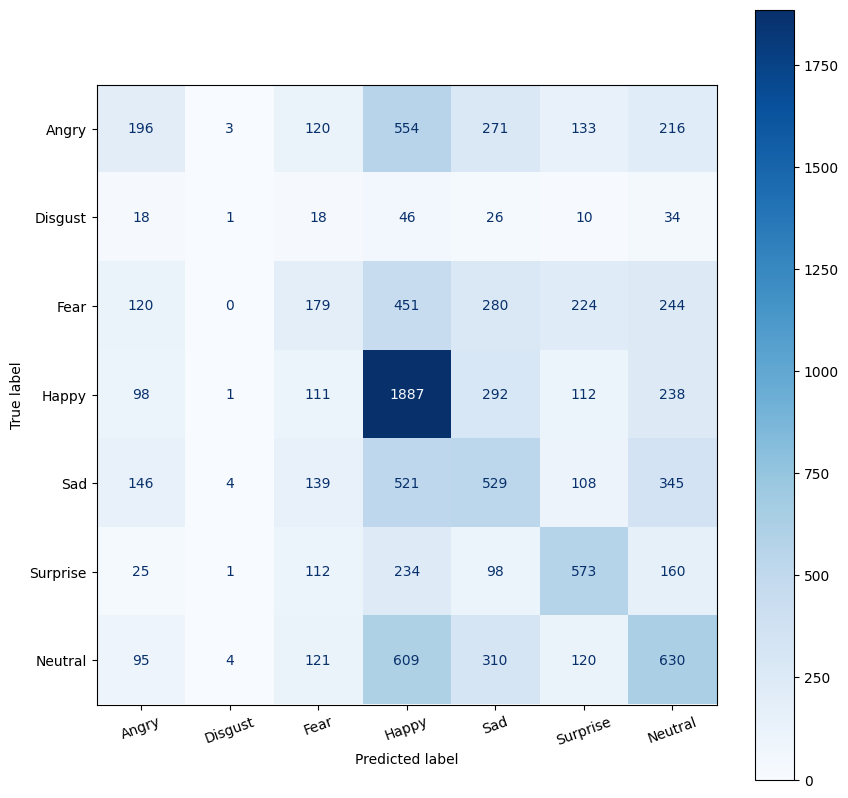

In [89]:
plot_confusion_matrix(y_test,y_test_pred_logictics_pca, classes)

In [ ]:
model_params  = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,40,80,120,140,200]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='multinomial'),
        'params': {
              'penalty': ['l1', 'l2'],
              'C': [1, 10, 20],
               'solver': ['lbfgs', 'sag', 'saga']
        }
    }
}

model_params1  = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [500,750,1000,1500]
        }
    }
}

MLP_parameters = {
          'hidden_layer_sizes': [(100,),(10,30,10),(20,)],
          'activation': ['logistic','tanh', 'relu'],
          'learning_rate_init': [0.01, 0.05],
          'solver': ['sgd', 'adam']
            }

In [90]:
mlp_gs = MLPClassifier()

In [91]:
clf_mlp_pca = GridSearchCV(mlp_gs,MLP_parameters,cv=2,verbose=2,return_train_score=False)
clf_mlp_pca.fit(X_train_pca,y_train_pca)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  33.7s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  24.9s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  25.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  40.8s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  22.3s
[CV] END activation=logistic, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  28.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  13.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  14.1s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   8.9s
[CV] END activation=logistic, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time=  17.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time=  17.7s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  17.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  17.2s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=  13.6s
[CV] END activation=logistic, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  49.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  50.7s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  38.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  38.1s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  49.7s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  33.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  43.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  23.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  23.1s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  13.9s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=   8.9s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  16.5s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  21.8s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   2.3s
[CV] END activation=tanh, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time=  23.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  21.1s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=adam; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=sgd; total time=  23.8s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=  14.2s
[CV] END activation=tanh, hidden_layer_sizes=(20,), learning_rate_init=0.05, solver=adam; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=sgd; total time=  31.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  14.3s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, solver=adam; total time=  17.9s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  14.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=sgd; total time=  16.5s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=  10.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.05, solver=adam; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=sgd; total time=  14.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  11.6s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.01, solver=adam; total time=  12.1s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=   9.8s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=sgd; total time=  13.2s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(10, 30, 10), learning_rate_init=0.05, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver=sgd; total time=  13.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate_init=0.01, solver

GridSearchCV(cv=2, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (10, 30, 10), (20,)],
                         'learning_rate_init': [0.01, 0.05],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [92]:
clf_mlp_pca.cv_results_

{'mean_fit_time': array([34.32878721, 25.03236997, 37.40594387, 25.09099531, 14.07844841,
        15.53902674, 13.87286711,  7.45749128, 17.58976424, 19.78408217,
        17.1116997 , 14.89344692, 50.15422094, 38.21783602, 41.4715898 ,
        31.12552547, 23.25029731, 11.34721196, 19.12496173,  2.05568445,
        22.00061893, 20.87052   , 23.51888287, 10.23378277, 31.47294819,
        16.05870128, 15.28059411, 10.15421307, 14.03340852, 11.82680154,
        11.46297228,  1.18714797, 14.20801044,  9.16246402, 11.63673604,
         3.46882749]),
 'std_fit_time': array([6.79743648e-01, 2.09552884e-01, 3.30749297e+00, 2.88621187e+00,
        1.13891363e-02, 3.31449509e-03, 2.01853991e-01, 1.39270484e+00,
        5.88647127e-02, 1.70705557e+00, 2.59798765e-02, 1.35474634e+00,
        4.80295062e-01, 2.59436250e-01, 8.16964006e+00, 1.25745313e+01,
        2.37732887e-01, 2.49502289e+00, 2.64027393e+00, 1.74939752e-01,
        1.81836295e+00, 1.73869491e-01, 2.01074481e-01, 3.94898748e+00,
 

In [93]:
List_i4_mlp_pca = pd.DataFrame(clf_mlp_pca.cv_results_)
List_i4_mlp_pca

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate_init,param_solver,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,34.328787,0.679744,0.073968,0.003169,logistic,"(100,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.332325,0.330892,0.331608,0.000717,25
1,25.032370,0.209553,0.073719,0.023505,logistic,"(100,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.320462,0.311385,0.315924,0.004538,31
2,37.405944,3.307493,0.071697,0.023001,logistic,"(100,)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.326433,0.322373,0.324403,0.002030,27
3,25.090995,2.886212,0.048689,0.000801,logistic,"(100,)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.327389,0.314968,0.321178,0.006210,29
4,14.078448,0.011389,0.034516,0.007087,logistic,"(10, 30, 10)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.336146,0.338933,0.337540,0.001393,23
5,15.539027,0.003314,0.028067,0.001301,logistic,"(10, 30, 10)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.343471,0.341242,0.342357,0.001115,17
6,13.872867,0.201854,0.056655,0.003989,logistic,"(10, 30, 10)",0.05,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.342914,0.351354,0.347134,0.004220,9
7,7.457491,1.392705,0.031275,0.003467,logistic,"(10, 30, 10)",0.05,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.346895,0.333439,0.340167,0.006728,20
8,17.589764,0.058865,0.038567,0.003081,logistic,"(20,)",0.01,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",0.350796,0.347532,0.349164,0.001632,7
9,19.784082,1.707056,0.019507,0.000268,logistic,"(20,)",0.01,adam,"{'activation': 'logistic', 'hidden_layer_sizes...",0.347213,0.340605,0.343909,0.003304,13


In [94]:
best_score_mlp_pca = clf_mlp_pca.best_score_
best_params_mlp_pca = clf_mlp_pca.best_params_
print(best_score_mlp_pca)
print(best_params_mlp_pca)

0.3765127388535032
{'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'solver': 'sgd'}


In [95]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
best_model_mlp_pca = clf_mlp_pca.best_estimator_
y_test_pred_mlp_pca = best_model_mlp_pca.predict(X_test_pca)

In [97]:
report = classification_report(y_test, y_test_pred_mlp_pca)
print(report)

              precision    recall  f1-score   support

           0       0.32      0.14      0.19      1493
           1       0.22      0.05      0.08       153
           2       0.23      0.11      0.15      1498
           3       0.49      0.71      0.58      2739
           4       0.29      0.33      0.31      1792
           5       0.48      0.54      0.51      1203
           6       0.35      0.38      0.36      1889

    accuracy                           0.40     10767
   macro avg       0.34      0.32      0.31     10767
weighted avg       0.37      0.40      0.37     10767



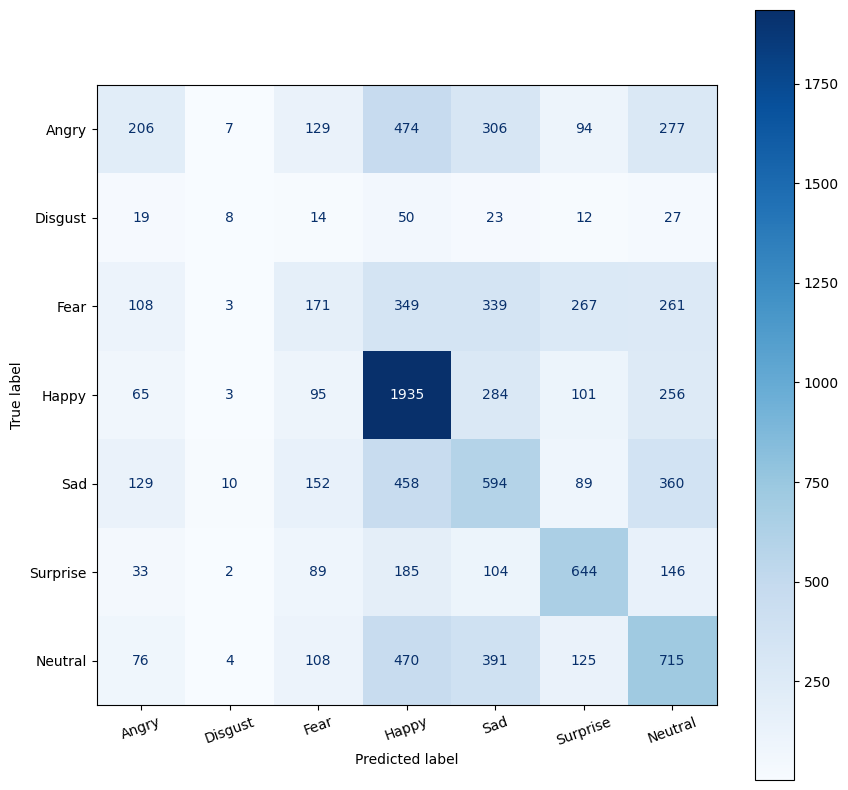

In [98]:
plot_confusion_matrix(y_test, y_test_pred_mlp_pca, classes)